# Python Introduction: tensorflow


**Import required packages**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

It was reported that MacOS gives an error during the model.fit() function.

To fix that error, please run the next cell

In [ ]:
# # uncomment and run the following lines if you're using MacOS
# import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True'

Find out which version you have for tensorflow.

We are currently utilizing Tensorflow 2.0 (or higher)

In [2]:
print(tf.__version__)

2.0.0


## About the MNIST Dataset
The MNIST dataset is a database of handwritten digits (0-9) that features 60,000 training images and 10,000 test images.

All images are 28x28 pixels and are in grayscale. It serves as a good dataset to test various classification algorithms on.

More information on the dataset can be found in __[Yann LeCun's MNIST Database](http://yann.lecun.com/exdb/mnist/)__

In [3]:
# Load the mnist dataset using Keras (TF)
mnist = tf.keras.datasets.mnist

# Divide the dataset into train and test using load_data function
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

print(type(x_train))

<class 'numpy.ndarray'>


### Visualize the dataset
Lets take a sample from each digit and visualize them

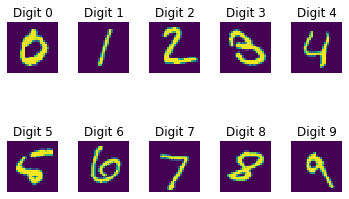

In [4]:
# obtain all unique values of labels -- expected output [0-9]
labels = set(y_test)

i = 0
for label in labels:
    imgs = x_test[y_test==label]
    img = imgs[0]
    
    # plot
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title('Digit %.f' %label)
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.4)
    i+=1


Build a sequential neural network

The network will be as follows:
* Input later of size 784
* Layer with 128 nodes with a relu activation function
* A dropout layer with dropout probability of 0.2
* A final Layer of size 10 with a softmax activation function

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Set the optimization package (algorithm) as adam and use a loss of spare categorical cross entropy. 

Use the accuracy (how often is the prediction correct) as the metric for the quality of output at each epoch.

*What is the difference between the loss function and the metric?*

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**What other optimizers, loss functions, and metrics are there?**:
* __[Loss Functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)__
* __[Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)__
* __[Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)__

Fit the model and evaluate the output accuracy

In [7]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3008 - accuracy: 0.9124
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1403 - accuracy: 0.9572
Epoch 3/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1070 - accuracy: 0.9677
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0879 - accuracy: 0.9733
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0748 - accuracy: 0.9761
10000/1 - 1s - loss: 0.0385 - accuracy: 0.9765


[0.07511392960115336, 0.9765]

Explain output
Show images! and classify

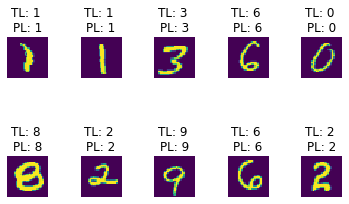

In [8]:
# pick 10 random images to classify
inds = random.sample([i for i in range(len(y_test))],10)

# predict the classes for each of the picked images
y_out = model.predict_classes(x_test[inds])

i = 0
for ind in inds:
    # plot each digit along with its True Label (TL) and Predicted Label (PL)
    img = x_test[ind]
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title('TL: %.f \nPL: %.f' %(y_test[ind],y_out[i]))
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.8)
    i+=1

# END OF TENSORFLOW INTRODUCTION